In [1]:
from atomphys import Atom
import numpy as np
import matplotlib.pyplot as plt
from math import pi as π

In [2]:
# fetch the NIST transition data for Mg+
Mg = Atom('Mg+')
units = Mg.units
c = units.c
ε_0 = units.ε_0

In [3]:
Mg('S1/2')

State(3s 2S1/2: 0 E_h)

In [4]:
# calculate the static polarizability for the ground state
Mg('S1/2').α().to('h Hz/(V/cm)^2')

0.00857300074692272 <Unit('centimeter ** 2 * hertz * planck_constant / volt ** 2')>

In [5]:
# calculate the dynamic polarizability for the ground state at 1064 nm
α0 = Mg('S1/2').α(λ=1064 * units.nm)
print((α0/(2*c*ε_0)).to('h Hz/(W/cm^2)'))

1.73 Hz·cm²·h/W


/home/graum/atomphys/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/graum/atomphys/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


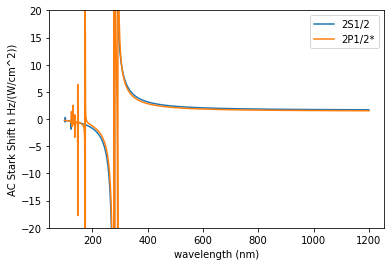

In [6]:
# make a figure of the AC stark shift 
λ = np.linspace(100,1200, 10000) * units.nm

plt.plot(λ, ( (1/(2*c*ε_0)) * Mg('S1/2').α(λ=λ) ).to('h Hz/(W/cm^2)'), label=Mg('S1/2').term)
plt.plot(λ, ( (1/(2*c*ε_0)) * Mg('P1/2').α(λ=λ) ).to('h Hz/(W/cm^2)'), label=Mg('P1/2').term)

plt.legend()
plt.xlabel('wavelength ({:})'.format(λ.units))
plt.ylabel('AC Stark Shift h Hz/(W/cm^2))')
plt.ylim(-20,20);

In [7]:
Rb = Atom('Rb')

/home/graum/atomphys/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/graum/atomphys/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


(-200.0, 200.0)

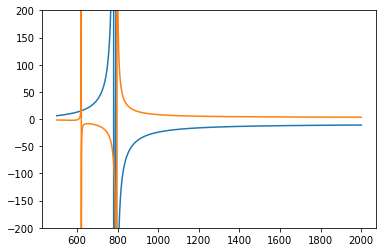

In [8]:
λ = np.linspace(500, 2000, 100000) * units.nm
I0 = units('2 W/(π*(10 um)^2)')

plt.plot(λ, ( -I0/(2*c*ε_0) * Rb('S1/2').α(λ=λ) ).to('h MHz'), label=Rb('S1/2').term)
plt.plot(λ, ( -I0/(2*c*ε_0) * Rb('P1/2').α(λ=λ) ).to('h MHz'), label=Rb('P1/2').term)

plt.ylim(-200, 200)

In [9]:
Rb('S1/2').to('P1/2')

Transition(5s 2S1/2 <---> 5p 2P1/2*, λ=795 nm, Γ=2π×5.745 MHz)

In [10]:
Rb('P1/2').transitions

2 Transitions (
Transition(5s 2S1/2 <---> 5p 2P1/2*, λ=795 nm, Γ=2π×5.745 MHz)
Transition(5p 2P1/2* <---> 6d 2D3/2, λ=620.8 nm, Γ=2π×0.4692 MHz))